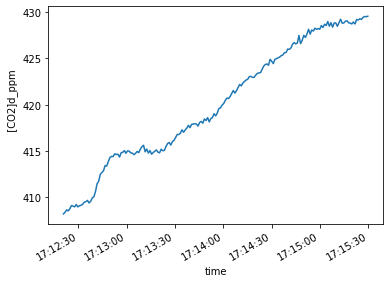

In [79]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from math import *

#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#Sample ID
sample_id = '2020_07-30_Vault-Lake_Buckt-T1'

# #submersion depth in water or snow (cm)
# #If multiple measurements are used in uneven surfaces, enter them in the mean field separated by comma
# #when not submerged, (i.e. with collars) enter "0"
sub_d = np.mean([0])

# #Exposed height of chamber/bucket above surface (cm)
# #If multiple measurements are used in uneven surfaces, enter them in the mean field separated by comma
xh = np.mean([34.5])-sub_d

# #collar height above surface (cm) (for use with big chamber and collars)
# #when partially submerged (non-collar measurements), comment out 1st "collar_h" (the one that subtracts the collar plunge depth, 3.53), and 
# #uncomment the 2nd "collar_h" with a mean of "0"
#collar_h = meancollar-3.53
#collar_h = np.mean([0])

#Atmospheric Pressure (inHg)
#https://www.wunderground.com/dashboard/pws/KAKFAIRB30/graph/2019-03-6/2019-03-6/daily
#time of pressure reading: 12:04
#P_inHg = 29.92
########################################################################


#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#Pressure data from Big Trail Tower Data file(units of Pa)
dfp = pd.read_csv(r'C:\Users\Simon\Documents\methane\June2019_T_P.csv', delimiter=',', parse_dates=[['date','time']])
P_Pa = dfp.loc[dfp['date_time'] == '6/11/2019 0:00','air_p_mean_Pa'].values
########################################################################


#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
# Enter LGR data file path 
# Read the text file and select a time section
#*****Sometimes "index_col = 1 instead of 0"********
df = pd.read_csv(r'C:\Users\Simon\Documents\methane\gga_2020-07-30_f0001.txt', delimiter=',', header = 1, index_col = 1)
########################################################################


#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#Start and stop time of chamber measurment in HH:MM:SS (24-hour time)

time0 = "17:12:20"
time1 = "17:15:30"

########################################################################

#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#
# Don't forget to assign output log file at the end of this notebook!!!
#
########################################################################

df.index = pd.DatetimeIndex(df.index)
df.index
df.keys()
df.head()


#Choose data series (i.e. methane dry mole fraction and gas temperature, CH4d_ppm and GasT_C)
ts          = df.between_time(start_time = "{}".format(time0), end_time = "{}".format(time1))['          [CO2]d_ppm']#.plot()
temperature = df.between_time(start_time = "{}".format(time0), end_time = "{}".format(time1))['              GasT_C']#.plot()


#Plot the raw LGR data for the measurement window
ts = xr.DataArray(ts, coords = [ts.index], dims = ['time'])
ts.plot()

temperature_mean = xr.DataArray(temperature, coords = [temperature.index], dims = ['time']).mean().data
temperature_error = temperature.std() + 1


In [78]:
df.head()


,SpectraID,[H2O]_ppm,[H2O]_ppm_sd,[CO2]_ppm,[CO2]_ppm_sd,[CH4H]_ppm,[CH4H]_ppm_sd,[CH4]_ppm,[CH4]_ppm_sd,[CH4]d_ppm,...,12CO2b_0110_AT_B,12CO2b_0110_AT_B_sd,12CO2b_0110_DF_B,12CO2b_0110_DF_B_sd,12CO2b_0110_PF_B,12CO2b_0110_PF_B_sd,Fit_Flag,N_Fits_Avg'd,MIU_VALVE,MIU_DESC
Time,,,,,,,,,,,,,,,,,,,,,
2020-07-30 17:07:39.166,0,30086.79,0.0,594.1394,0.0,20.54349,0.0,2.998238,0.0,0.000000,...,0.275478,0.0,0.010096,0.0,0.072559,0.0,2,1,-1,Disabled
2020-07-30 17:07:40.160,0,32404.86,0.0,568.8053,0.0,36.38113,0.0,2.809131,0.0,3.098650,...,0.264164,0.0,0.010096,0.0,0.072559,0.0,2,1,-1,Disabled
2020-07-30 17:07:41.155,0,33076.16,0.0,540.8327,0.0,18.59629,0.0,2.663917,0.0,2.905225,...,0.250616,0.0,0.010096,0.0,0.072559,0.0,2,1,-1,Disabled
2020-07-30 17:07:42.150,0,33589.52,0.0,521.6709,0.0,32.11876,0.0,2.536774,0.0,2.756507,...,0.242287,0.0,0.010096,0.0,0.072559,0.0,2,1,-1,Disabled
2020-07-30 17:07:43.144,0,34082.69,0.0,499.3725,0.0,23.40098,0.0,2.430420,0.0,2.626285,...,0.231620,0.0,0.010096,0.0,0.072559,0.0,2,1,-1,Disabled


In [75]:
# #This section is optimized for the "bucket chambers" in the snow. 
# # #A snow density is assumed from literature values, and the snow water equivalent is calculated to 
# # #correct for the snow's porosity in the chamber
# # #Conditions for snow or sediment height estimation
# if xh <= 5:
#     xh_error = xh*0.5
# else :
#      xh_error = xh*0.2

# #Chamber dimensions for white buckets (units of cm)
# h = 34.5
# diam_top = 25.8
# r_top = diam_top/2

# # #"bottom" here is actually the top of the bucket. Because when modelling a truncated cone, it's 
# # #easier to think of the bottom as the base with the larger radius
# diam_bottom = 29
# r_bottom = diam_bottom/2

# # #lid volume (cm^3)
# lid_vol = 975
# lid_vol_error = lid_vol* 0.01

# # #tubing dimensions (cm, cm^3 for t_vol)
# t_length = 914.4
# t_length_error = t_length * 0.05
# t_id = 0.3175
# t_vol = pi*((t_id/2)**2)*t_length
# t_vol_error = t_length_error * abs(t_id)

# # #LGR cell volume (cm^3)
# LGR_vol = 335
# LGR_vol_error = LGR_vol*0.01

# # #Volume of Chamber (as a truncated cone) (cm^3)
# vol = pi*h*(r_bottom**2 + r_top**2 + r_bottom*r_top)/3

# # #Normal Height (height from center of bottom base to apex of the imaginary cone) (cm)
# n_height = h + ((h*r_top)/(r_bottom - r_top))

# # #Volume of Normal cone (if chamber were not truncated, i.e. bucket-shaped)(cm^3)
# cone_volume = (1/3)*pi*(r_bottom**2)*n_height

# # #Volume of the imaginary cone (the volume that is removed/truncated to form the bucket shape)(cm^3)
# imagine_volume = (1/3)*pi*(r_top**2)*(n_height - h)

# # #Hypotenuse of Normal cone (cm)
# hypo_cone = sqrt((r_bottom**2)+(n_height**2))

# # #angle of normal cone apothems (radians)
# angle = (asin(r_bottom/hypo_cone))*2

# # #Normal height of Snow Cone (cm)
# n_height_snow = (n_height - h) + (h - xh)
# n_height_snow_error = xh_error

# # #exterior angle *between snow level and the side of bucket (downward) (degrees)
# ex_angle = 180 - ((angle*(180/pi))/2) - 90

# # #Hypotenuse of Snow cone (cm)
# hypo_snow = (n_height_snow/cos(angle/2))
# hypo_snow_error = n_height_snow_error*abs((cos(angle/2)))

# # #Radius of top of snow (cm)
# r_snow = sqrt((hypo_snow**2)-(n_height_snow**2))
# r_snow_error = 2*(hypo_snow_error/abs(hypo_snow))*abs(r_snow) + 2*(n_height_snow_error/abs(n_height_snow))*abs(r_snow)

# # #Volume of snow cone (cm^3)
# snow_cone_volume = (1/3)*pi*(r_snow**2)*(n_height_snow)
# snow_cone_volume_error = (sqrt((r_snow_error/r_snow)**2 + (n_height_snow_error/n_height_snow)**2))*abs(pi/3)

# # #Uncorrected Volume of Snow in Chamber (non-porous snow) (cm^3)
# un_snow_vol = snow_cone_volume - imagine_volume
# un_snow_vol_error = snow_cone_volume_error

# # #Snow bulk density (g/cm^3) Sturm et al. 2010 Journal of Hydrometeorology
# # #Mean = 0.217 g/cm^3 Taken from 1541 observations in Alaskan/Canadian Taiga
# # #Std = 0.056 g/cm^3 
# pb = 0.217
# pb_error = 0.056

# # #Snow water equivalent (cm)
# swe = (h - xh)*(pb/1)
# swe_error = sqrt((xh_error/xh)**2 + (pb_error/pb)**2)

# # #Corrected volume of snow (cylinder since "top" base of bucket is pushed into snow)(cm^3)
# corrected_snow_vol = pi*(r_top**2)*swe
# corrected_snow_vol_error = swe_error *abs(pi*(r_top**2))

# # #Total volume(cm^3)
# total_vol = vol -un_snow_vol + lid_vol + t_vol + LGR_vol
# total_vol_error = un_snow_vol_error + lid_vol_error + t_vol_error + LGR_vol_error

# # #Total volume corrected (accounting for swe-based snow volume)(cm^3)
# total_vol_corr = vol - corrected_snow_vol + lid_vol + t_vol + LGR_vol
# total_vol_corr_error = corrected_snow_vol_error + lid_vol_error+ t_vol_error + LGR_vol_error

# # #Convert total corrected volume to liters (L)
# V = total_vol_corr / 1000
# V_error = total_vol_corr_error / 1000

# # #Surface area of chamber opening (m^2)
# area = pi*(r_top**2)/10000

In [46]:
# This section is optimized for the "bucket chambers" in saturated sediments. 
# snow density calculations are not required 

#Chamber dimensions for white buckets (units of cm)
h = 34.5
diam_top = 25.8
r_top = diam_top/2

# "bottom" here is actually the top of the bucket. Because when modelling a truncated cone, it's 
# easier to think of the bottom as the base with the larger radius
diam_bottom = 29
r_bottom = diam_bottom/2

#lid volume (cm^3)
lid_vol = 975
lid_vol_error = lid_vol* 0.01

#tubing dimensions (cm, cm^3 for t_vol)
t_length = 914.4
t_length_error = t_length * 0.05
t_id = 0.3175
t_vol = pi*((t_id/2)**2)*t_length
t_vol_error = t_length_error * abs(t_id)

#LGR cell volume (cm^3)
LGR_vol = 335
LGR_vol_error = LGR_vol*0.01

#Volume of Chamber (as a truncated cone) (cm^3)
vol = pi*h*(r_bottom**2 + r_top**2 + r_bottom*r_top)/3

#Normal Height (height from center of bottom base to apex of the imaginary cone) (cm)
n_height = h + ((h*r_top)/(r_bottom - r_top))

#Volume of Normal cone (if chamber were not truncated, i.e. bucket-shaped)(cm^3)
cone_volume = (1/3)*pi*(r_bottom**2)*n_height

#Volume of the imaginary cone (the volume that is removed/truncated to form the bucket shape)(cm^3)
imagine_volume = (1/3)*pi*(r_top**2)*(n_height - h)

#Hypotenuse of Normal cone (cm)
hypo_cone = sqrt((r_bottom**2)+(n_height**2))

#angle of normal cone apothems (radians)
angle = (asin(r_bottom/hypo_cone))*2

#Normal height of sediment Cone (cm)
n_height_sed = (n_height - h) + (h - xh)
n_height_sed_error = xh_error

#exterior angle *between sediment level and the side of bucket (downward) (degrees)
ex_angle = 180 - ((angle*(180/pi))/2) - 90

#Hypotenuse of sediment cone (cm)
hypo_sed = (n_height_sed/cos(angle/2))
hypo_sed_error = n_height_sed_error*abs((cos(angle/2)))

#Radius of top of sediment (cm)
r_sed = sqrt((hypo_sed**2)-(n_height_sed**2))
r_sed_error = 2*(hypo_sed_error/abs(hypo_sed))*abs(r_sed) + 2*(n_height_sed_error/abs(n_height_sed))*abs(r_sed)

#Volume of sediment cone (cm^3)
sed_cone_volume = (1/3)*pi*(r_sed**2)*(n_height_sed)
sed_cone_volume_error = (sqrt((r_sed_error/r_sed)**2 + (n_height_sed_error/n_height_sed)**2))*abs(pi/3)

#Uncorrected Volume of sediment in Chamber (non-porous snow) (cm^3)
un_sed_vol = sed_cone_volume - imagine_volume
un_sed_vol_error = sed_cone_volume_error

#Snow bulk density (g/cm^3) Sturm et al. 2010 Journal of Hydrometeorology
#Mean = 0.217 g/cm^3 Taken from 1541 observations in Alaskan/Canadian Taiga
#Std = 0.056 g/cm^3
pb = 0.217
pb_error = 0.056

#Snow water equivalent (cm)
swe = (h - xh)*(pb/1)
swe_error = sqrt((xh_error/xh)**2 + (pb_error/pb)**2)

#Corrected volume of snow (cylinder since "top" base of bucket is pushed into snow)(cm^3)
corrected_snow_vol = pi*(r_top**2)*swe
corrected_snow_vol_error = swe_error *abs(pi*(r_top**2))

#Total volume(cm^3)
total_vol = vol -un_sed_vol + lid_vol + t_vol + LGR_vol
total_vol_error = un_sed_vol_error + lid_vol_error + t_vol_error + LGR_vol_error

#Total volume corrected (accounting for swe-based snow volume)(cm^3)
total_vol_corr = vol - corrected_snow_vol + lid_vol + t_vol + LGR_vol
total_vol_corr_error = corrected_snow_vol_error + lid_vol_error+ t_vol_error + LGR_vol_error

#Convert total corrected volume to liters (L)
V = total_vol / 1000
V_error = total_vol_error / 1000

#Surface area of chamber opening (m^2)
area = pi*(r_top**2)/10000

In [47]:
# # This section is optimized for the "large square chambers" rested on aluminum collar locations. 
# # density calculations are not required 

# #Chamber dimensions for large clear chamber (units of cm)
# h = 106.5 - sub_d
# w = 65.7
# d = 65.7
# vol = h*w*d
# vol_error = vol * 0.05
# xh = h + collar_h

# #Collar dimensions (units of cm)
# collar_w = 70.7
# collar_d = 70.7
# collar_vol = collar_h*collar_w*collar_d
# collar_vol_error = collar_vol * 0.05

# #tubing dimensions (cm, cm^3 for t_vol)
# t_length = 914.4
# t_length_error = t_length * 0.05
# t_id = 0.3175
# t_vol = pi*((t_id/2)**2)*t_length
# t_vol_error = t_length_error * abs(t_id)

# #LGR cell volume (cm^3)
# LGR_vol = 335
# LGR_vol_error = LGR_vol*0.01

# #Snow bulk density (g/cm^3) Sturm et al. 2010 Journal of Hydrometeorology
# #Mean = 0.217 g/cm^3 Taken from 1541 observations in Alaskan/Canadian Taiga
# #Std = 0.056 g/cm^3
# pb = 0.217
# pb_error = 0.056

# #Snow water equivalent (cm)
# swe = (h - xh)*(pb/1)
# swe_error = sqrt((xh_error/xh)**2 + (pb_error/pb)**2)

# #Corrected volume of snow (cylinder since "top" base of bucket is pushed into snow)(cm^3)
# corrected_snow_vol = pi*(r_top**2)*swe
# corrected_snow_vol_error = swe_error *abs(pi*(r_top**2))

# #Total volume(cm^3)
# total_vol = vol + t_vol + LGR_vol + collar_vol
# total_vol_error = vol_error + t_vol_error + LGR_vol_error + collar_vol_error

# #Convert total corrected volume to liters (L)
# V = total_vol / 1000
# V_error = total_vol_error / 1000

# #Surface area of collar opening (m^2)
# area = (collar_w*collar_d)/10000


In [48]:
# As a sanity check, print the volume of the chamber/bucket and it's error in liters
print('volume = ', V, ' ±',  V_error,  ' liters')

volume =  21.748288570762956  ± 0.027723097717474457  liters


Goal: 
We find sections in the observation window which are
1. at least 50 seconds long and no more than 210 (50 < n > 210)
2. the linear slope of the section should fit the data with R2 0.985. WHich means 98% of the variation in data can be explained by our model. 

Algorithm:
We start with a section of first 210 points from the section window. We fit a line to the section and compute the errors as the squareroot of the diagnols of the covariance matrix between the model and data. We also compute R2 between the slope and the data and if R2 is greater than 0.985, we stop, since we got the largest continuous section which fulfils the requirement. i.e. our best case scenario! If we don't get a valid slope value, we shift the section by 1. i.e. from the second element to 211th element in the section window and repeat the process. If we don't get a valid slope even after shifting through the entire length of the section window, we reduce the section length to 209 and start sliding. So on until we reduce the section length to its lowest threshold, i.e. 50. 

If we still don't get a valid value for the smallest section, we start smoothing the sections by 5, 10, and ultimately 15-point moving windows. 

In [49]:
# In[]

def compute_r2(ts_section, plot = False):
     x     = np.arange(len(ts_section))
     #removes time metadata for simplicity
     y     = np.array(ts_section)
     model = np.polyfit(x,y,1)
     slope = model[0]
     intercept = model[1]
     y_hat = slope*x + intercept # OR np.polyval(model, x)
     correlation_coefficient = np.corrcoef(y,y_hat)[0,1]
     r_square = (correlation_coefficient)**2
     if plot:
         plt.plot(y)
         plt.plot(y_hat)

     return r_square, slope
def brain(section_length, ts):
    for section_length in section_length:
        # print(section_length)
        r_2 = []
        slope = []
        start = []
        # end   = []
        # section_length = 210
        for i in range(len(ts)-section_length):
            ts_section = ts[i:i + section_length]
            tmp_start  = ts_section.time[0]
            tmp_end    = ts_section.time[-1]
            tmp_r2, tmp_slope = compute_r2(ts_section, plot=False)
            r_2.append(tmp_r2)
            slope.append(tmp_slope)
            start.append(tmp_start)
            # end.append(tmp_end)

        r_2 = xr.DataArray(r_2, coords = [ts[:-int(section_length)].time], dims = ['time'])
        slope = xr.DataArray(slope, coords = [ts[:-int(section_length)].time], dims = ['time'])
        # end = xr.DataArray(end, coords = [ts[:-int(section_length)].time], dims = ['time'])
        # start = xr.DataArray(start, coords = [ts[:-int(section_length)].time], dims = ['time'])
        # just select those r2s that qualify the threshold, drop the rest to get time stamp

        # c = end.where(r_2>=r_2_threshold, drop=True)
        #

        a = list(slope.where(r_2>=r_2_threshold, drop=True))
        R_squared = list(r_2.where(r_2>=r_2_threshold, drop=True))
        result = []
        valid_length = []
        if a:
            # print(a)
            result = a[0].data
            valid_length = section_length
            # print('starting time stamp' + a[0].time)
            break

        # ts.sel(time=slice(b[0],c[0]))
        # ts.plot()
        # ts.loc[a.time.values].plot()
        #
        # np.where(ts.index==a.time[0])
    return valid_length, result, a, R_squared

In [50]:
print(sample_id)

#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
# Set data quality thresholds
min_section_length_original = 45
max_section_length = 210
r_2_threshold = 0.985
#starting smoothing window
smoothing_window = 0
########################################################################

section_length   = np.arange(min_section_length_original,max_section_length+1)[::-1]
valid_section_length, slope, a, R_squared = brain(section_length, ts)
if slope:
                print('valid section length = %.3f' %valid_section_length)
                print('Smoothing_window = %.3f' %smoothing_window)
#                 print('Slope = %.4f' %slope)
#                 print('Temperature = %.3f' %temperature_mean)
#                 print('Section start timestamp = ' +str(a[0].time.data))
else:
    smoothing_window  = 5
    min_section_length = min_section_length_original*2
    section_length   = np.arange(min_section_length,max_section_length+1)[::-1]
    ts_smooth = ts.rolling(time = smoothing_window, center = True).mean().dropna(dim='time')
    valid_section_length, slope, a, R_squared = brain(section_length, ts_smooth)
    if slope:
                print('valid section length = %.3f' %valid_section_length)
                print('Smoothing_window = %.3f' %smoothing_window)
#                 print('Slope = %.4f' %slope)
#                 print('Temperature = %.3f' %temperature_mean)
#                 print('Section start timestamp = ' +str(a[0].time.data))    
    else:
        smoothing_window  = 10
        min_section_length = int(min_section_length_original*2)
        section_length   = np.arange(min_section_length,max_section_length+1)[::-1]
        ts_smooth = ts.rolling(time = smoothing_window, center = True).mean().dropna(dim='time')
        valid_section_length, slope, a, R_squared = brain(section_length, ts_smooth)
        if slope:
                print('valid section length = %.3f' %valid_section_length)
                print('Smoothing_window = %.3f' %smoothing_window)
#                 print('Slope = %.4f' %slope)
#                 print('Temperature = %.3f' %temperature_mean)
#                 print('Section start timestamp = ' +str(a[0].time.data))        
        else:
            smoothing_window  = 15
            min_section_length = min_section_length_original*3
            section_length   = np.arange(min_section_length,max_section_length+1)[::-1]
            ts_smooth = ts.rolling(time = smoothing_window, center = True).mean().dropna(dim='time')
            valid_section_length, slope, a, R_squared = brain(section_length, ts_smooth)
            if slope:
                print('valid section length = %.3f' %valid_section_length)
                print('Smoothing_window = %.3f' %smoothing_window)
#                 print('Slope = %.4f' %slope)
#                 print('Temperature = %.3f' %temperature_mean)
#                 print('Section start timestamp = ' +str(a[0].time.data))
            else:
                print('Oh no, bad data! Go back to field!!')

2020_07-30_Vault-Lake_Buckt-T1
valid section length = 137.000
Smoothing_window = 0.000


2020_07-30_Vault-Lake_Buckt-T1
valid section length = 137
Smoothing_window = 0
Slope = 0.12458 ppm/s
R^2 = 0.9852 
Temperature = 29.392 deg. C
Section start timestamp = 2020-07-30T17:13:02.506000000
Slope error = 0.001315 ppm/s
Flux = 2.039 ± 0.011 
Units = micromol CH4 m^-2 s^-1


ValueError: fname must be a PathLike or file handle

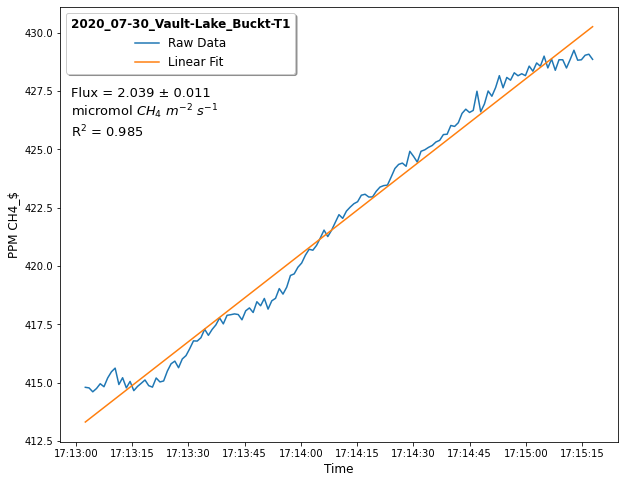

In [80]:
# Plot the 'good' section and slope error
def get_slope_error(ts_section, plot = True):
     x     = np.arange(len(ts_section))
     #removes time metadata for simplicity
     y     = np.array(ts_section)
     model, M = np.polyfit(x,y,1, cov = True)
     slope = model[0]
     slope_error = np.sqrt(M[0][0])
     intercept = model[1]
     y_hat = slope*x + intercept # OR np.polyval(model, x)

     if plot:
            print('Slope error = %.6f ppm/s' %slope_error)
#             plt.figure(figsize = (10,8))
#             plt.plot(ts_section.time, y)
#             plt.plot(ts_section.time, y_hat)
     return slope, slope_error, ts_section, y, y_hat

print(sample_id)
print('valid section length = %d' %valid_section_length)
print('Smoothing_window = %d' %smoothing_window)
print('Slope = %.5f ppm/s' %slope)
print('R^2 = %.4f ' %R_squared[0].data)
print('Temperature = %.3f deg. C' %temperature_mean)
print('Section start timestamp = ' +str(a[0].time.data))

#Convert the section start time from datetime stamp to actual index of the original section window.
index = np.where(ts.time ==a[0].time)[0][0]
slope, slope_error, ts_section, y, y_hat = get_slope_error(ts[index: index+valid_section_length], plot = True)
#print('Slope error = %.6f ppm/s' %slope_error)

#Calculate Flux and its +/- uncertainty (micromoles m^-2 s^-1)
#Gas Constant L atm mol^-1 K^-1
#pressure in atmospheres (atm)
P = 9.86923e-6 * P_Pa
P_error = P * 0.01
R = 0.082057338
moles = (P*V)/(R*(temperature_mean+273.15))
moles_error = sqrt((P_error/P)**2 + (V_error/V)**2 + (temperature_error/(temperature_mean+273.15)**2))
flux = slope*moles/area
flux_error = (sqrt(slope_error/abs(slope))**2 + (moles_error/moles)**2)
print('Flux = %.3f ' %flux + '± %.3f ' %flux_error)
#print('Flux Error = ± %.3f ' %flux_error)
print('Units = micromol CH4 m^-2 s^-1')

#make the Figure
figure, ax = plt.subplots(figsize = (10,8))
ax.plot(ts_section.time, y)
ax.plot(ts_section.time, y_hat)
plt.ylabel('PPM CH4_$', fontsize = 12)
plt.xlabel('Time',fontsize = 12)
legend = plt.legend(('Raw Data', 'Linear Fit'), title = sample_id, loc='upper left', fontsize = 12, shadow=True)
plt.setp(legend.get_title(),fontsize='large', fontweight = 'bold')
plt.text(0.02,0.7, 'Flux = %.3f ± %.3f \nmicromol $CH_4$ $m^{-2}$ $s^{-1}$ \nR$^2$ = %.3f' %(flux, flux_error,R_squared[0].data), fontsize = 13, transform=ax.transAxes)

# #save the figure. 
# #########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
# #########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
plt.savefig((Path(r'C:\Users\Simon\Documents\methane\_' + sample_id + '.png'),'dpi = 300', 'bbox_inches = tight'))
# ########################################################################
# print('xh = %.1f' %xh)
# Out put the data from the computation. 
# With each program iteration, the results from the computation are saved into the space-delimited
# .txt file specified below (i.e. "July2019FluxData.txt")
# output variables to save into the output log file
# output_data = [sample_id,temperature_mean,P[0],area,V,xh,valid_section_length,smoothing_window,slope,slope_error,R_squared[0].data,str(a[0].time.data),flux[0],flux_error[0]]
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################

            
with open(r'C:\Users\Simon\Documents\methane\OutputData_newtry.txt',"at") as f:
    f.write('\n')
    np.savetxt(f, output_data, fmt="%s", delimiter=' ', newline=' ')
# ########################################################################  
# print(output_data)
# use this space delimited text (staring with "Sample_ID") to fill in the header line once time after the file is generated
# for the first time.
# NOTE: The header labels must be in the same order as the data in the "output_data" array:
# Sample_ID Temp_C P_atm Area_m2 ChamberVol_L Chamber_height_cm valid_section_seconds smoothing_seconds slope_ppm_-s slope_error Rsquared Start_time flux_umol_m-2_s flux_error

In [67]:
# Out put the data from the computation. 
# With each program iteration, the results from the computation are saved into the space-delimited
# .txt file specified below (i.e. "July2019FluxData.txt")

# output variables to save into the output log file
output_data = [sample_id,temperature_mean,P[0],area,V,xh,valid_section_length,smoothing_window,slope,slope_error,
               R_squared[0].data,str(a[0].time.data),flux[0],flux_error[0]]

#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
#########!!!INPUT!!!########!!!INPUT!!!####!!!INPUT!!!##################
with open(r'C:\Users\Simon\Documents\methane\OutputData_newtry.txt',"at") as f:
    f.write('\n')
    np.savetxt(f, output_data, fmt="%s", delimiter=' ', newline=' ')
########################################################################
    
print(output_data)
    
# use this space delimited text (staring with "Sample_ID") to fill in the header line once time after the file is generated
# for the first time.
# NOTE: The header labels must be in the same order as the data in the "output_data" array:

# Sample_ID Temp_C P_atm Area_m2 ChamberVol_L Chamber_height_cm valid_section_seconds smoothing_seconds slope_ppm_-s slope_error Rsquared Start_time flux_umol_m-2_s flux_error

['2020_07-30_Vault-Lake_Buckt-T1', array(29.39231539), 0.9765988463627656, 0.05227924334838775, 21.748288570762956, 34.5, 137, 0, array(0.12457911), 0.0013145489768308742, array(0.98519128), '2020-07-30T17:13:02.506000000', 2.0387015767445633, 0.010706854423231146]
